# Anibal Muñoz
# 21.087.122-5
# Diego Vergara
# 19.940.239-0
# Cristobal Galaz
# 20.359.833-5

In [8]:
#------Manejo de datos------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#------Modelos------
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [9]:
data = pd.read_excel("data.xlsx")
data.shape

(129094, 24)

In [5]:
data.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,5,3,5,5,4,...,5,25,18,0,0,1,1,0,0,1


In [6]:
data.values

array([[  13,  460,    3, ...,    0,    0,    1],
       [  25,  235,    3, ...,    1,    0,    0],
       [  26, 1142,    2, ...,    1,    0,    0],
       ...,
       [  52,  674,    4, ...,    0,    1,    0],
       [  44, 3857,    1, ...,    1,    0,    0],
       [  31,  373,    2, ...,    0,    1,    0]], dtype=int64)

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [123]:
# Reducir dimensiones, por ejemplo a 50 dimensiones
pca = PCA(n_components=24)
data_reduced = pca.fit_transform(data_scaled)

# Con los datos cargados se procedera a realizar clusterizacion entre edad de los pasajeros y la distancia de vuelo

In [68]:
agevfd = data[["Age","Flight Distance"]]
agevfd.head()

,Age,Flight Distance
0,13,460
1,25,235
2,26,1142
3,25,562
4,61,214


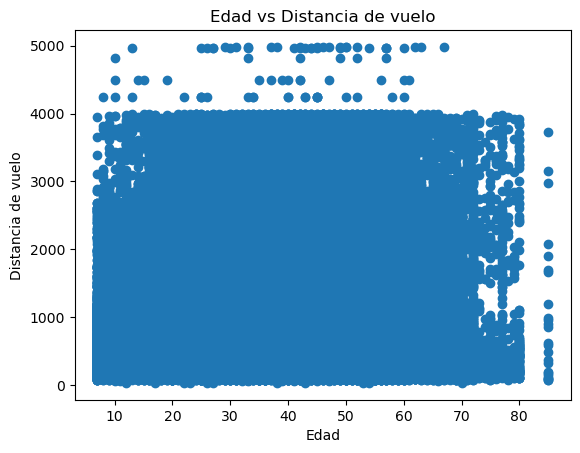

In [70]:
plt.scatter(agevfd['Age'], agevfd['Flight Distance']) 
plt.title('Edad vs Distancia de vuelo')
plt.xlabel('Edad')
plt.ylabel('Distancia de vuelo')
plt.show()

In [71]:
sse = []
# Se realiza el analisis con hasta 20 clusteres, no se cree que supere esa cantidad
for k in range(1, 20):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(agevfd)
  sse.append(kkmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0, 0.5, 'SSE')

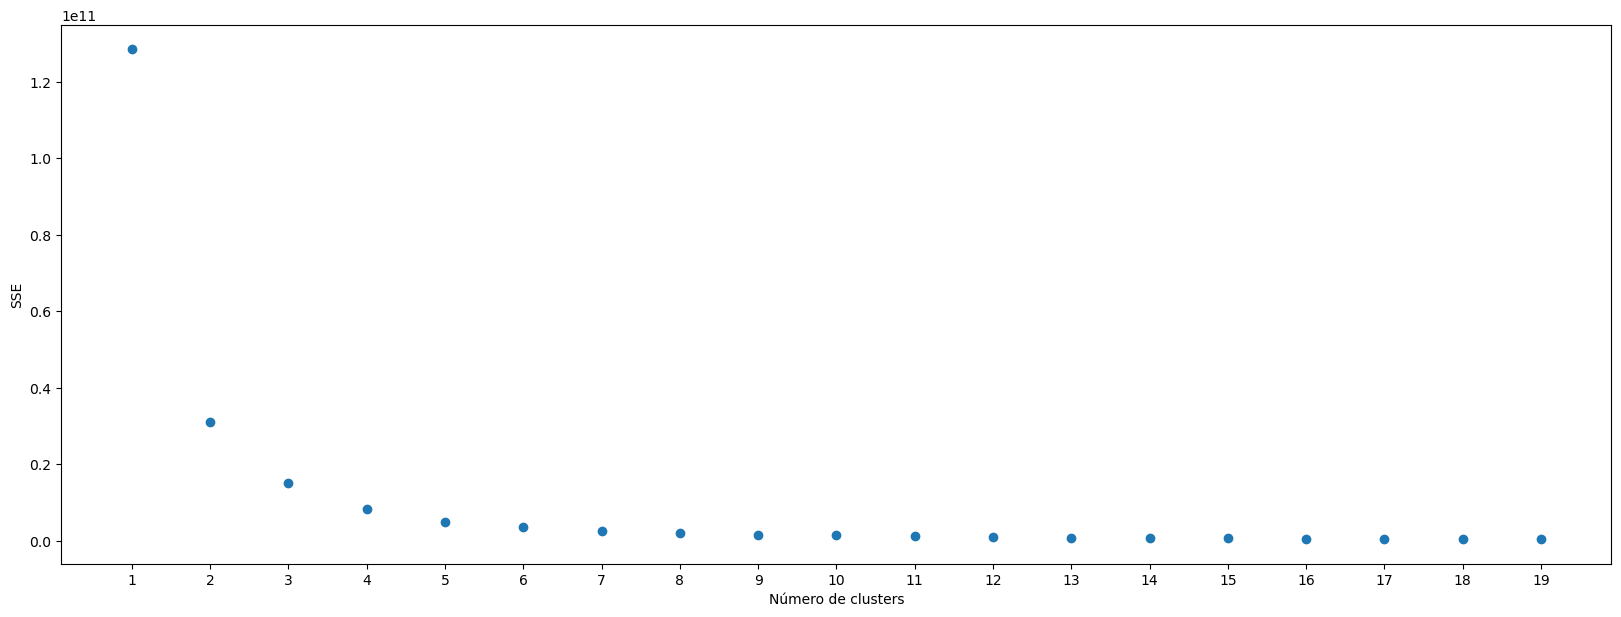

In [72]:
fig, ax = plt.subplots(figsize = (20, 7))
ax.scatter(range(1, 20), sse)
ax.set_xticks(range(1, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

In [73]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 3


In [74]:
kmeans = KMeans(n_clusters=3, random_state=366)

kmeans.fit(agevfd)

clusters = kmeans.fit_predict(agevfd)

In [76]:
centroids = kmeans.cluster_centers_
print("Forma de los centroides:",centroids.shape)
print(centroids[:5])

Forma de los centroides: (3, 2)
[[  38.33876336  553.0795311 ]
 [  43.06790945 3189.20222312]
 [  40.34500525 1797.30131182]]


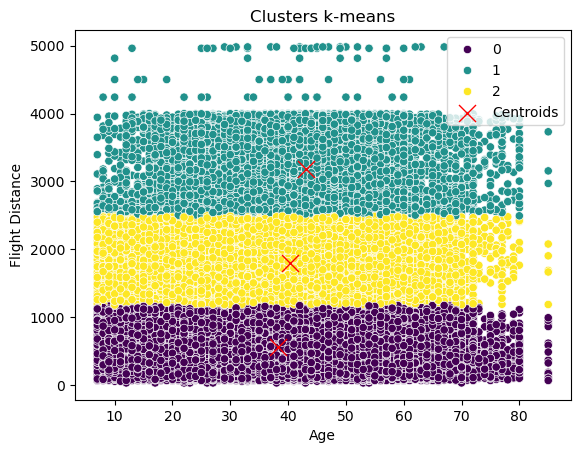

In [77]:
labels = kmeans.labels_

sns.scatterplot(data=agevfd, x='Age', y='Flight Distance', hue=labels, palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
            marker='x', s=150, color='Red', label='Centroids')
plt.title('Clusters k-means')
plt.xlabel('Age')
plt.ylabel('Flight Distance')
plt.legend()
plt.show()

In [78]:
score = silhouette_score(agevfd, clusters)
print(f"Silhouette Score para k={k}: {score:.2f}")

Silhouette Score para k=19: 0.64


### Los resultados de Silhouete Score dejan en claro que los cluesteres generados poseen una consistencia interna y estan a una buena distancia los puntos de sus centroides

# Se procedera a realizar una clusterizacion usnado el retraso de despegue con la distancia de vuelo

In [79]:
ddmvfd = data[["Departure Delay in Minutes","Flight Distance"]]
ddmvfd.head()

,Departure Delay in Minutes,Flight Distance
0,25,460
1,1,235
2,0,1142
3,11,562
4,0,214


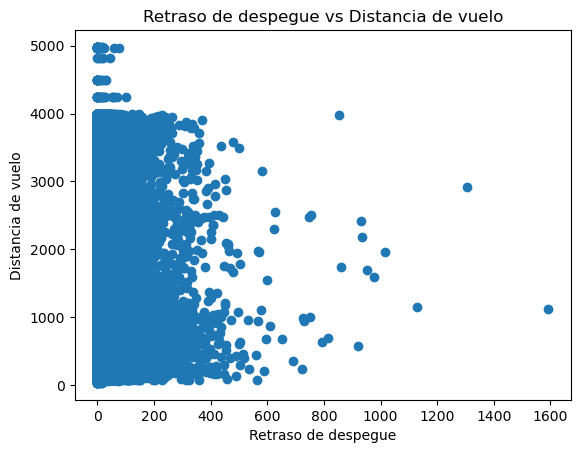

In [80]:
plt.scatter(ddmvfd['Departure Delay in Minutes'], ddmvfd['Flight Distance']) 
plt.title('Retraso de despegue vs Distancia de vuelo')
plt.xlabel('Retraso de despegue')
plt.ylabel('Distancia de vuelo')
plt.show()

In [81]:
sse2 = []
# Se realiza el analisis con hasta 20 clusteres, no se cree que supere esa cantidad
for k in range(1, 20):
  print(k)
  kkmeans2 = KMeans(n_clusters=k)
  kkmeans2.fit(ddmvfd)
  sse2.append(kkmeans2.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0, 0.5, 'SSE')

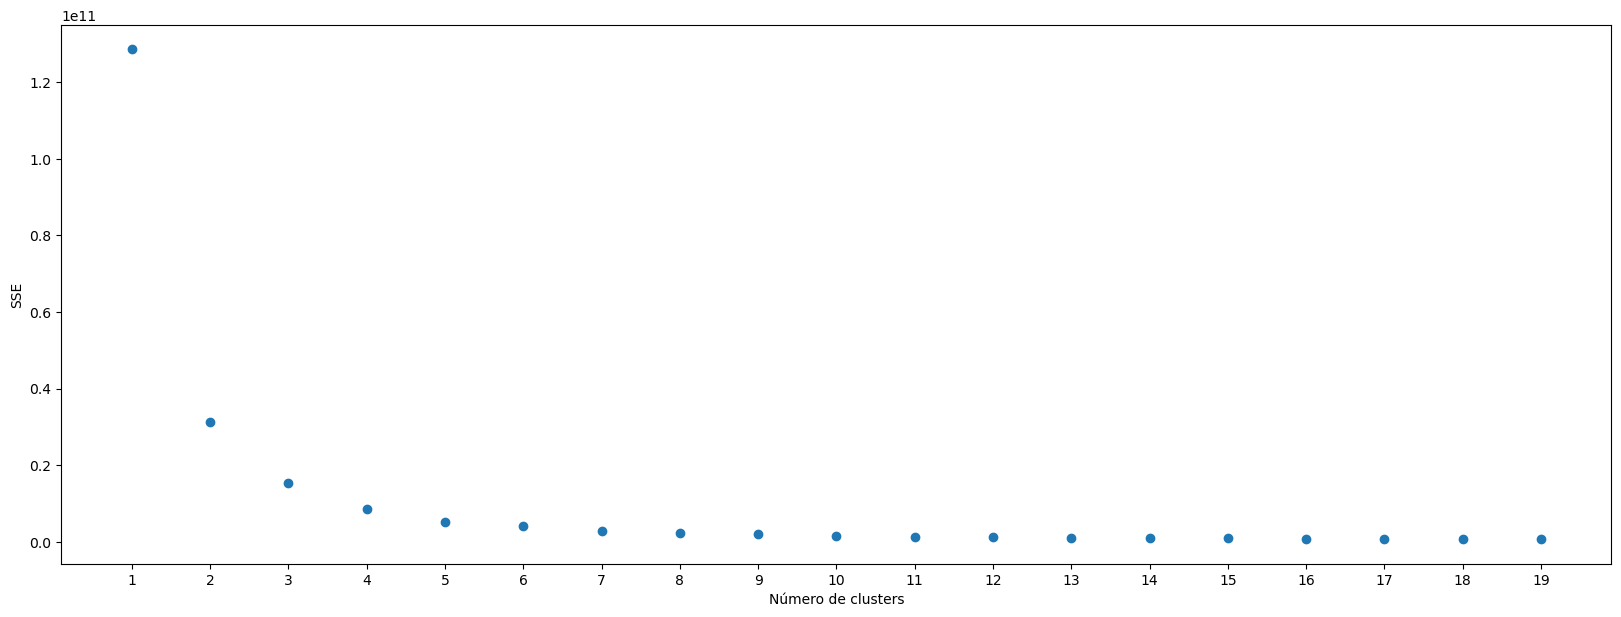

In [82]:
fig, ax = plt.subplots(figsize = (20, 7))
ax.scatter(range(1, 20), sse2)
ax.set_xticks(range(1, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

In [83]:
kl = KneeLocator(range(1, 20), sse2, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 3


In [84]:
kmeans2 = KMeans(n_clusters=3, random_state=366)

kmeans2.fit(ddmvfd)

clusters2 = kmeans2.fit_predict(ddmvfd)

In [85]:
centroids2 = kmeans2.cluster_centers_
print("Forma de los centroides:",centroids2.shape)
print(centroids2[:5])

Forma de los centroides: (3, 2)
[[  14.79070018  562.13606045]
 [  14.33738023 3208.13188121]
 [  14.39570595 1834.01358394]]


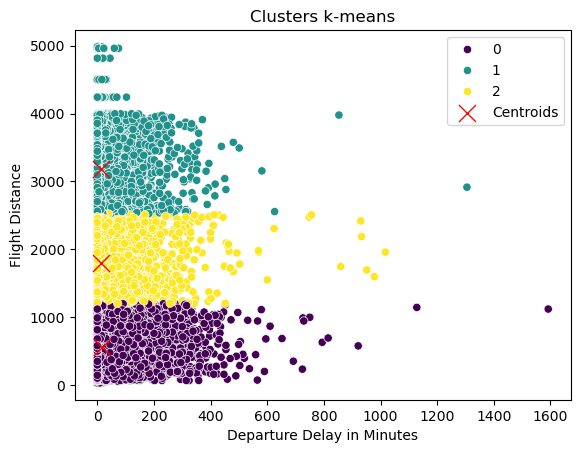

In [86]:
labels = kmeans2.labels_

sns.scatterplot(data=ddmvfd, x='Departure Delay in Minutes', y='Flight Distance', hue=labels, palette='viridis')
sns.scatterplot(x=kmeans2.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
            marker='x', s=150, color='Red', label='Centroids')
plt.title('Clusters k-means')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Flight Distance')
plt.legend()
plt.show()

In [87]:
score = silhouette_score(ddmvfd, clusters2)
print(f"Silhouette Score para k={k}: {score:.2f}")

Silhouette Score para k=19: 0.64


### Los resultados de Silhouete Score dejan en claro que los cluesteres generados poseen una consistencia interna y estan a una buena distancia los puntos de sus centroides

# Se procedera a realizar una clusterizacion utilizando todas las variables del dataset

In [88]:
todo = [
    'Age', 'Flight Distance', 'Inflight wifi service',
    'Ease of Online booking', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness', 'Customer Type_encoded',
    'Type of Travel_encoded', 'Gender_encoded', 'Class_Business',
    'Class_Eco', 'Class_Eco Plus'
]

All_in = data[todo]
All_in.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,0,1,1,0,0,1
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0,1,1,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,1,0,0
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,0,0,0,1,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,1,0,0


In [89]:
scaler = StandardScaler()
All_in_scaled = scaler.fit_transform(All_in)

In [90]:
sse3 = []
# Se realiza el analisis con hasta 20 clusteres, no se cree que supere esa cantidad
for k in range(1, 20):
  print(k)
  kkmeans3 = KMeans(n_clusters=k)
  kkmeans3.fit(All_in_scaled)
  sse3.append(kkmeans3.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0, 0.5, 'SSE')

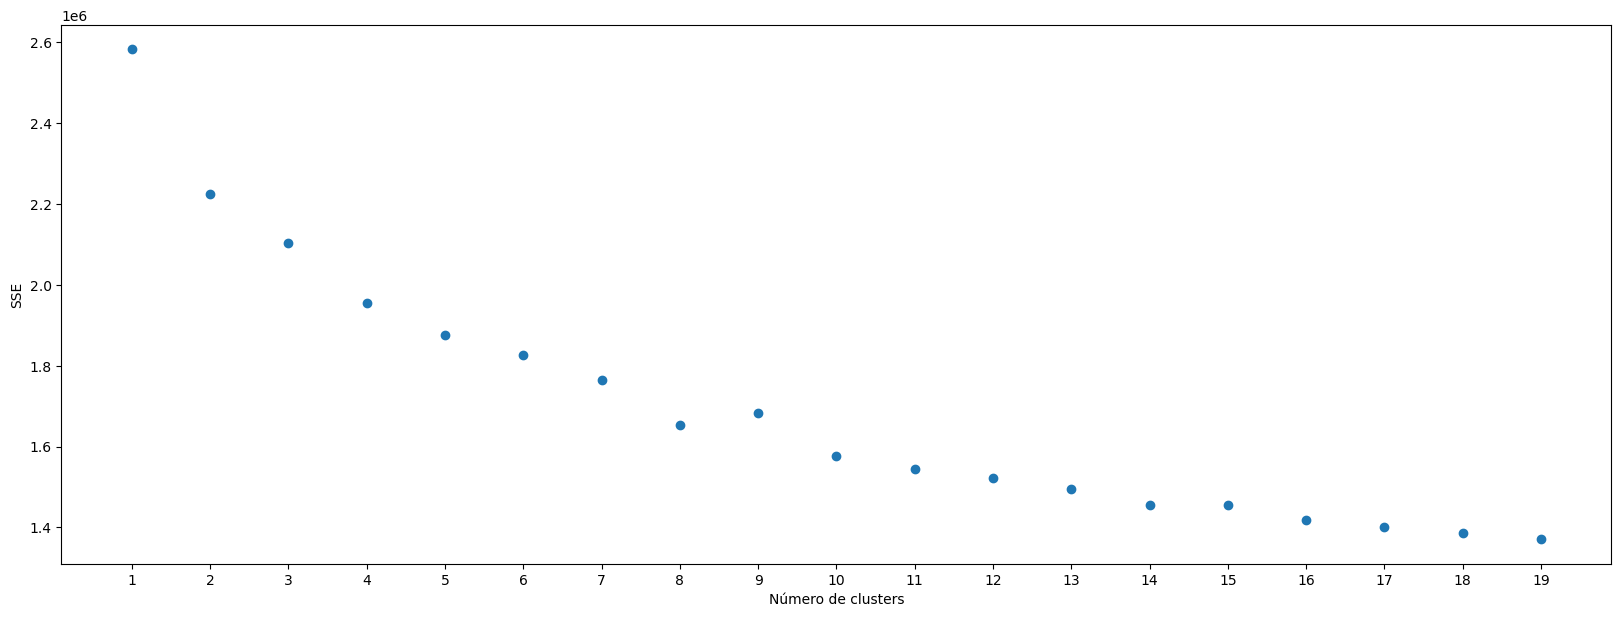

In [91]:
fig, ax = plt.subplots(figsize = (20, 7))
ax.scatter(range(1, 20), sse3)
ax.set_xticks(range(1, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

In [111]:
kl = KneeLocator(range(1, 20), sse3, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 8


In [113]:
k = 8
kmeans3 = KMeans(n_clusters=k, random_state=366)
clusters3 = kmeans3.fit_predict(All_in_scaled)

In [115]:
centroids3 = kmeans3.cluster_centers_
print("Forma de los centroides:",centroids3.shape)
print(centroids3[:5])

Forma de los centroides: (8, 20)
[[-6.16026421e-01 -4.70336850e-01  8.97186318e-02  6.31297726e-02
  -1.04632955e+00 -3.15409226e-01 -1.16112336e+00 -1.14985768e+00
  -8.45227387e-02 -7.61590281e-02  8.24976123e-02 -6.11185216e-02
   9.19955315e-02 -1.13309402e+00  2.11173944e+00 -6.55012629e-01
  -6.35056214e-02 -9.77595134e-03  5.39031378e-03  8.49634487e-03]
 [-1.78360461e-01 -4.29531079e-01 -2.18216789e-01 -3.40607517e-01
   4.25134803e-01 -3.43880672e-01  2.33286917e-01  4.07224921e-01
   4.66268760e-03 -2.67879112e-01  6.59268127e-02 -3.84253971e-02
   1.16948979e-01  4.05046617e-01 -4.68375289e-01  1.11206849e+00
   7.54007146e-02 -9.55216454e-01  8.82613202e-01  1.47350822e-01]
 [-3.96508897e-01 -2.58383376e-01 -3.71696261e-01 -1.38081956e-01
  -1.17578629e+00 -8.19785873e-01 -1.29293483e+00 -1.16941480e+00
  -1.86635007e-01 -9.81888045e-02 -1.02724417e-02 -2.54653017e-01
  -4.11566490e-03 -1.26620439e+00 -4.71571492e-01  7.44714319e-01
   2.45684951e-01  1.36045050e-02 -1.8806

In [117]:
pca = PCA(n_components=2)
All_in_pca = pca.fit_transform(All_in_scaled)

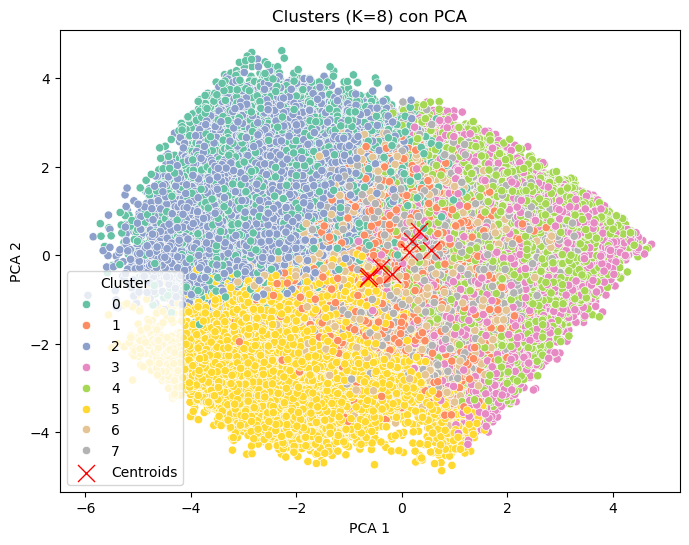

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y = All_in_pca[:, 1], hue=clusters3, palette="Set2")
sns.scatterplot(x=kmeans3.cluster_centers_[:, 0], y=kmeans3.cluster_centers_[:, 1],
            marker='x', s=150, color='Red', label='Centroids')
plt.title(f'Clusters (K={k}) con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [127]:
score = silhouette_score(All_in_scaled, clusters3)
print(f"Silhouette Score para k={k}: {score:.2f}")

Silhouette Score para k=8: 0.09
